# Home 3: Build a CNN for image recognition.

### Name: Sean Trinh


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
def to_one_hot(y, num_class=10):
    vect = []
    for item in y:
       x = [0]*item[0] + [1] + [0]*(num_class - 1 - item[0])
       vect += [x]
    return numpy.array(vect)

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0 0 0 0 0 0 1 0 0 0]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [3]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras import regularizers

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
__________

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=90, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)
from keras import optimizers

learning_rate = 1E-3 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])
history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 131s 3ms/step - loss: 1.2862 - acc: 0.5589 - val_loss: 1.0913 - val_acc: 0.6375
Epoch 2/10
40000/40000 [==============================] - 125s 3ms/step - loss: 0.9546 - acc: 0.6935 - val_loss: 1.2209 - val_acc: 0.6181
Epoch 3/10
40000/40000 [==============================] - 126s 3ms/step - loss: 0.8324 - acc: 0.7437 - val_loss: 0.8930 - val_acc: 0.7277
Epoch 4/10
40000/40000 [==============================] - 136s 3ms/step - loss: 0.7489 - acc: 0.7788 - val_loss: 0.9212 - val_acc: 0.7256
Epoch 5/10
40000/40000 [==============================] - 140s 3ms/step - loss: 0.6834 - acc: 0.8060 - val_loss: 1.1622 - val_acc: 0.6790
Epoch 6/10
40000/40000 [==============================] - 138s 3ms/step - loss: 0.6421 - acc: 0.8254 - val_loss: 0.8598 - val_acc: 0.7696
Epoch 7/10
40000/40000 [==============================] - 143s 4ms/step - loss: 0.5981 - acc: 0.8462 - val_loss: 0.8462 - 

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

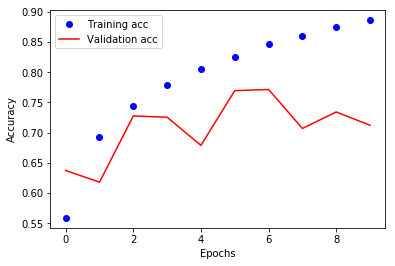

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate), metrics=['acc'])


In [8]:
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=10)


Epoch 1/10
50000/50000 [==============================] - 165s 3ms/step - loss: 0.6277 - acc: 0.8594
Epoch 2/10
50000/50000 [==============================] - 160s 3ms/step - loss: 0.5808 - acc: 0.8741
Epoch 3/10
50000/50000 [==============================] - 162s 3ms/step - loss: 0.5492 - acc: 0.8862
Epoch 4/10
50000/50000 [==============================] - 168s 3ms/step - loss: 0.5398 - acc: 0.8919
Epoch 5/10
50000/50000 [==============================] - 166s 3ms/step - loss: 0.5286 - acc: 0.9008
Epoch 6/10
50000/50000 [==============================] - 164s 3ms/step - loss: 0.5217 - acc: 0.9060
Epoch 7/10
50000/50000 [==============================] - 166s 3ms/step - loss: 0.5155 - acc: 0.9088
Epoch 8/10
50000/50000 [==============================] - 168s 3ms/step - loss: 0.5121 - acc: 0.9116
Epoch 9/10
50000/50000 [==============================] - 164s 3ms/step - loss: 0.5075 - acc: 0.9148
Epoch 10/10
50000/50000 [==============================] - 162s 3ms/step - loss: 0.5061 - a

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [9]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 6s 642us/step
loss = 1.5123439922332764
accuracy = 0.7188
